In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyscf.data.nist as nist

In [2]:
h2curve = np.load('h2dissoc.npz')

In [3]:
dists = h2curve['dists']
elec_energies = h2curve['elec']
nuc_energies = h2curve['nuc']

In [4]:
grd = np.linspace(0,20,1000)
import scipy
H_one_energy = -13.605551091294029
sep_E = 2*H_one_energy
nuc_fn = lambda r: nist.HARTREE2EV * (nist.BOHR / r)
max_range = 100

addl_dists = np.arange(6, max_range+1, 1)
dists_aug = np.concatenate((dists, addl_dists))
elec_energies_aug = np.concatenate((elec_energies, sep_E - nuc_fn(addl_dists)))

elec_ifn = scipy.interpolate.PchipInterpolator(dists_aug, elec_energies_aug)
def V(r):
    return (nuc_fn(r) + elec_ifn(r)-2*H_one_energy)/nist.HARTREE2EV

def getVwithL(l, mass):
    def Vl(r):
        return V(r) + l*(l+1)/(2*mass*(r/nist.BOHR)**2)
    return Vl

[-35983.77180025 -31824.92257581 -27901.63429935 -24209.03753063
 -20744.13127513 -17506.02196378 -14496.16146885 -11718.71496624
  -9181.11682833  -6894.8615423   -4876.59652368  -3149.65977871
  -1746.37259574   -711.56619048   -107.61840424]


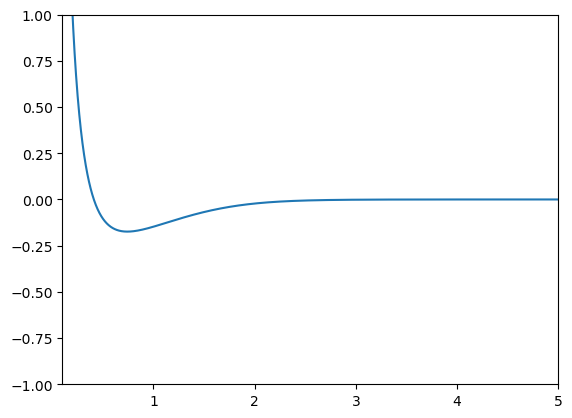

In [5]:
N = 10000
mass = nist.PROTON_MASS / nist.E_MASS / 2
hbar = 1
xgrid = np.linspace(0.001,20,N)
dx = (xgrid[1] - xgrid[0])/nist.BOHR
T_ =  scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) / dx**2
KE = -hbar**2 / (2 * mass) * T_
Vgrid = getVwithL(0,mass)(xgrid)
H = KE + scipy.sparse.diags(Vgrid, 0, shape=(N, N))
from scipy.sparse.linalg import eigsh
eigenvalues, eigenvectors = eigsh(H, k=15, which='LM', sigma=min(0, Vgrid.min()))

np.diff(np.minimum(0,eigenvalues))*nist.HARTREE2WAVENUMBER
plt.plot(xgrid,Vgrid)
plt.xlim(0.1,5)
plt.ylim(-1,1)
print(eigenvalues*nist.HARTREE2WAVENUMBER)

In [6]:
def getmodes(l):
    N = 10000
    mass = nist.PROTON_MASS / nist.E_MASS / 2
    hbar = 1
    xgrid = np.linspace(0.001,20,N)
    dx = (xgrid[1] - xgrid[0])/nist.BOHR
    T_ =  scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) / dx**2
    KE = -hbar**2 / (2 * mass) * T_
    Vgrid = getVwithL(l,mass)(xgrid)
    H = KE + scipy.sparse.diags(Vgrid, 0, shape=(N, N))
    from scipy.sparse.linalg import eigsh
    eigenvalues, eigenvectors = eigsh(H, k=15, which='LM', sigma=min(0, Vgrid.min()))

    allmodes = np.minimum(0,eigenvalues)*nist.HARTREE2EV
    return allmodes[allmodes<0]

In [335]:
modes_dict = [getmodes(l) for l in range(32)]
lcoeff = [(2*l+1)*np.ones_like(modes_dict[l]) for l in range(20)]

modes_wav_orig = np.concatenate(modes_dict)
modes_wav = modes_wav_orig - np.min(modes_wav_orig)

modes_mult = np.concatenate(lcoeff)

modes_wav_even = np.concatenate(modes_dict[::2])
modes_wav_even = modes_wav_even - np.min(modes_wav_orig)
modes_mult_even = np.concatenate(lcoeff[::2])


modes_wav_odd = np.concatenate(modes_dict[1::2])
modes_wav_odd = modes_wav_odd - np.min(modes_wav_orig)
modes_wav_odd_shifted = modes_wav_odd - np.min(modes_wav_odd)
modes_mult_odd = np.concatenate(lcoeff[1::2])

In [8]:
(modes_dict[1]-modes_dict[0])*nist.HARTREE2WAVENUMBER/nist.HARTREE2EV

array([118.37708012, 112.46984079, 106.68670326, 100.98962396,
        95.33246865,  89.66156979,  83.91388379,  78.012566  ,
        71.86033692,  65.32991237,  58.249152  ,  50.3741795 ,
        41.33408164,  30.49919332,  16.49852887])

In [9]:
modes_wav_even

array([0.        , 0.51563158, 1.00205733, 1.45988098, 1.8894746 ,
       2.29094899, 2.66412412, 3.0084836 , 3.32310567, 3.6065652 ,
       3.85679816, 4.07091103, 4.24489647, 4.37319611, 4.44807609,
       0.04389605, 0.5573349 , 1.04161385, 1.49732244, 1.92481556,
       2.32418396, 2.69522411, 3.0373909 , 3.34972618, 3.63075716,
       3.87835521, 4.08953502, 4.26014894, 4.38439798, 4.45400107,
       0.1447793 , 0.6531534 , 1.13247221, 1.58329158, 2.00592572,
       2.4004181 , 2.76650936, 3.10358586, 3.4106021 , 3.68597003,
       3.92740334, 4.13168912, 4.29432237, 4.4088542 , 0.29913664,
       0.79969424, 1.27135318, 1.71461486, 2.12972799, 2.51665996,
       2.87506084, 3.20420465, 3.50290108, 3.76936838, 4.00105013,
       4.19433081, 4.34403597, 4.44231039, 0.50192538, 0.99209257,
       1.45355859, 1.88674732, 2.29181511, 2.6686217 , 3.01668735,
       3.33512259, 3.62252252, 3.87681222, 4.09501246, 4.272841  ,
       4.40388285, 0.74707639, 1.22449973, 1.67344362, 2.09422

In [10]:
kb_wav = 8.617333262e-5

In [267]:
def h2_rovibZ(T, mm=modes_mult, mw=modes_wav):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((mm*np.exp(-np.multiply.outer(beta, mw))),axis=-1)

def h2_rovibZ_odd(T):
    return 3*h2_rovibZ(T, mm=modes_mult_odd, mw=modes_wav_odd)

def h2_rovibZ_even(T):
    return h2_rovibZ(T, mm=modes_mult_even, mw=modes_wav_even)

def h2_rovibZ_eq(T):
    return h2_rovibZ_odd(T)+h2_rovibZ_even(T)


def h2_rovibE(T, mm=modes_mult, mw=modes_wav):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((mm*mw*np.exp(-np.multiply.outer(beta, mw))),axis=-1)/h2_rovibZ(T, mm=modes_mult, mw=modes_wav)

def h2_rovibE_odd(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return 3*np.sum((modes_mult_odd*modes_wav_odd*np.exp(-np.multiply.outer(beta, modes_wav_odd))),axis=-1)/h2_rovibZ_odd(T)

def h2_rovibE_even(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((modes_mult_even*modes_wav_even*np.exp(-np.multiply.outer(beta, modes_wav_even))),axis=-1)/h2_rovibZ_even(T)

def h2_rovibE_mix(T):
    return 3/4*h2_rovibE_odd(T)+1/4*h2_rovibE_even(T)

def h2_rovibE_eq(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return (3*np.sum((modes_mult_odd*modes_wav_odd*np.exp(-np.multiply.outer(beta, modes_wav_odd))),axis=-1) +
    np.sum((modes_mult_even*modes_wav_even*np.exp(-np.multiply.outer(beta, modes_wav_even))),axis=-1)) / h2_rovibZ_eq(T)
    

In [268]:
def gradgrid(grd, vals):
    return grd[:-1]+(grd[1]-grd[0])/2, np.diff(vals)/(grd[1]-grd[0])

In [269]:
cp_params = np.load('cp_params.npz')

In [270]:
def calc_cp_ref(T, type='normal', R=1):
    uk = cp_params[f'{type}_uk']
    vk = cp_params[f'{type}_vk']
    vdivt=np.multiply.outer(vk,1.0/T)
    evk = np.exp(vdivt)
    insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2
    return R*(2.5 + np.sum(insum, axis=0))

In [271]:
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r"""
\usepackage{newtxtext}
\usepackage{newtxmath}
\renewcommand{\familydefault}{\rmdefault}

"""

mpl.rcParams['pgf.preamble'] = r"""
\usepackage{newtxtext}
\usepackage{newtxmath}
\renewcommand{\familydefault}{\rmdefault}

"""
mpl.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams.update({
    "font.family": "serif"
})
tgrid = np.linspace(1,1000,5000)

dgrd, normal_pred = gradgrid(tgrid, h2_rovibE_mix(tgrid)/kb_wav)
dgrd, eq_pred = gradgrid(tgrid, h2_rovibE_eq(tgrid)/kb_wav)

dgrd, para_pred = gradgrid(tgrid, h2_rovibE_even(tgrid)/kb_wav)
dgrd, ortho_pred = gradgrid(tgrid, h2_rovibE_odd(tgrid)/kb_wav)

errs_ortho = calc_cp_ref(dgrd, type='ortho')-2.5-ortho_pred
errs_para = calc_cp_ref(dgrd, type='para')-2.5-para_pred
errs_normal = calc_cp_ref(dgrd, type='normal')-2.5-normal_pred

/tmp/ipykernel_11662/2680339833.py:5: RuntimeWarning: overflow encountered in exp
  evk = np.exp(vdivt)
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: overflow encountered in multiply
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: overflow encountered in square
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: invalid value encountered in divide
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2


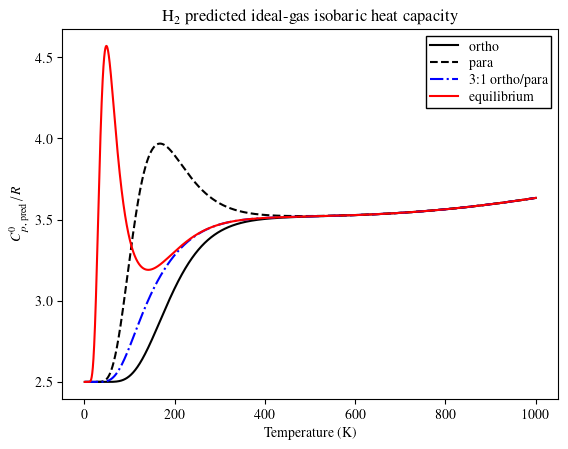

In [272]:
fig, ax = plt.subplots()
ax.plot(dgrd, ortho_pred+2.5, 'k-', label='ortho')
ax.plot(dgrd, para_pred+2.5, 'k--', label='para')
ax.plot(dgrd, normal_pred+2.5, 'b-.', label='3:1 ortho/para')
ax.plot(dgrd, eq_pred+2.5, 'r-', label='equilibrium')

plt.xlabel("Temperature (K)")
plt.ylabel(r"$C^0_{p,\,\mathrm{pred}}/R$")
plt.title("H$_2$ predicted ideal-gas isobaric heat capacity")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
plt.show()
fig.savefig("cp_pred.pdf")

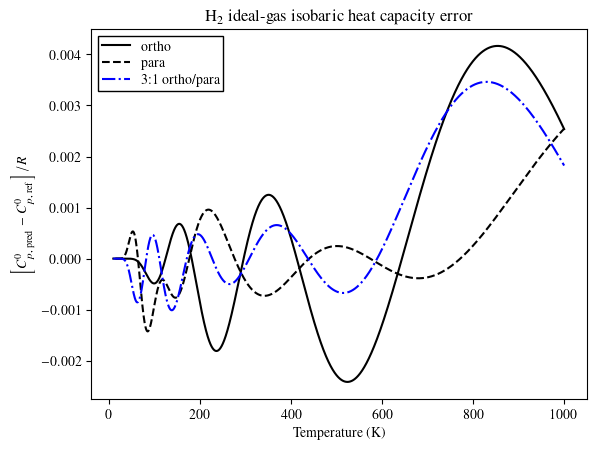

In [273]:
fig, ax = plt.subplots()
ax.plot(dgrd, errs_ortho, 'k-', label='ortho')
ax.plot(dgrd, errs_para, 'k--', label='para')
ax.plot(dgrd, errs_normal, 'b-.', label='3:1 ortho/para')
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\left[C^0_{p,\,\mathrm{pred}}-C^0_{p,\,\mathrm{ref}}\right]/R$")
plt.title("H$_2$ ideal-gas isobaric heat capacity error")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
plt.show()
fig.savefig("cp_err.pdf")

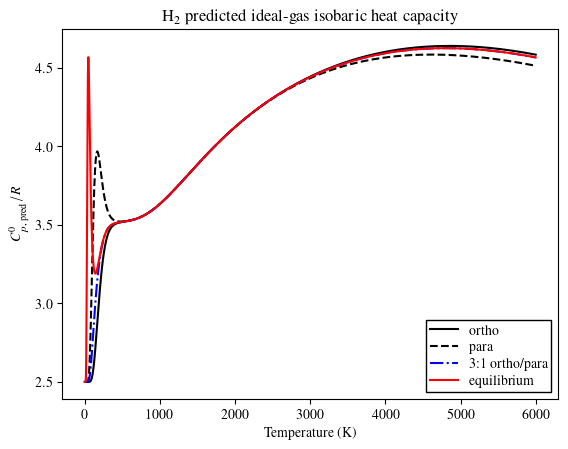

In [274]:
tgrid = np.linspace(1,6000,5000)
dgrd, normal_pred = gradgrid(tgrid, h2_rovibE_mix(tgrid)/kb_wav)
dgrd, para_pred = gradgrid(tgrid, h2_rovibE_even(tgrid)/kb_wav)
dgrd, ortho_pred = gradgrid(tgrid, h2_rovibE_odd(tgrid)/kb_wav)
dgrd, eq_pred = gradgrid(tgrid, h2_rovibE_eq(tgrid)/kb_wav)

fig, ax = plt.subplots()
ax.plot(dgrd, ortho_pred+2.5, 'k-', label='ortho')
ax.plot(dgrd, para_pred+2.5, 'k--', label='para')
ax.plot(dgrd, normal_pred+2.5, 'b-.', label='3:1 ortho/para')
ax.plot(dgrd, eq_pred+2.5, 'r-', label='equilibrium')

plt.xlabel("Temperature (K)")
plt.ylabel(r"$C^0_{p,\,\mathrm{pred}}/R$")
plt.title("H$_2$ predicted ideal-gas isobaric heat capacity")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
plt.show()
fig.savefig("cp_pred_ht.pdf")


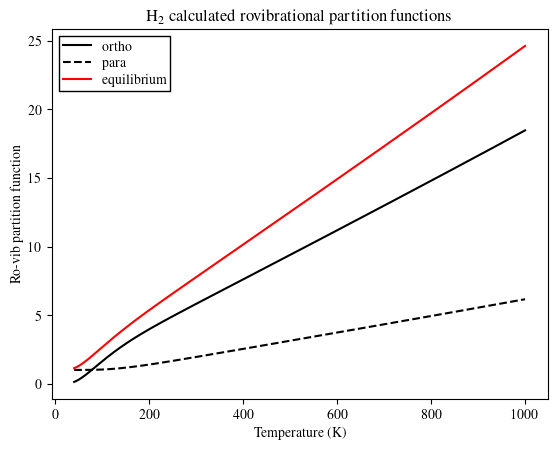

In [275]:
fig, ax = plt.subplots()
tgrid = np.linspace(40,1000,5000)
ax.plot(tgrid, h2_rovibZ_odd(tgrid), 'k-', label='ortho')
ax.plot(tgrid, h2_rovibZ_even(tgrid), 'k--', label='para')
ax.plot(tgrid, h2_rovibZ_eq(tgrid), 'r-', label='equilibrium')
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Ro-vib partition function")
ax.set_title("H$_2$ calculated rovibrational partition functions")
plt.show()
fig.savefig("plotZ.pdf")

In [276]:
def h2_rovibZ(T, mm=modes_mult, mw=modes_wav):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((mm*np.exp(-np.multiply.outer(beta, mw))),axis=-1)

def h2_rovibZ_odd(T):
    return 3*h2_rovibZ(T, mm=modes_mult_odd, mw=modes_wav_odd)

def h2_rovibZ_even(T):
    return h2_rovibZ(T, mm=modes_mult_even, mw=modes_wav_even)

def h2_rovibZ_eq(T):
    return h2_rovibZ_odd(T)+h2_rovibZ_even(T)


def h2_rovibE(T, mm=modes_mult, mw=modes_wav):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((mm*mw*np.exp(-np.multiply.outer(beta, mw))),axis=-1)/h2_rovibZ(T, mm=modes_mult, mw=modes_wav)

def h2_rovibE_odd(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return 3*np.sum((modes_mult_odd*modes_wav_odd*np.exp(-np.multiply.outer(beta, modes_wav_odd))),axis=-1)/h2_rovibZ_odd(T)

def h2_rovibE_even(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return np.sum((modes_mult_even*modes_wav_even*np.exp(-np.multiply.outer(beta, modes_wav_even))),axis=-1)/h2_rovibZ_even(T)

def h2_rovibE_mix(T):
    return 3/4*h2_rovibE_odd(T)+1/4*h2_rovibE_even(T)

def h2_rovibE_eq(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return (3*np.sum((modes_mult_odd*modes_wav_odd*np.exp(-np.multiply.outer(beta, modes_wav_odd))),axis=-1) +
    np.sum((modes_mult_even*modes_wav_even*np.exp(-np.multiply.outer(beta, modes_wav_even))),axis=-1)) / h2_rovibZ_eq(T)
    

In [277]:
vibE=4161.16632 / nist.HARTREE2WAVENUMBER * nist.HARTREE2EV

rotE=60.86 / nist.HARTREE2WAVENUMBER * nist.HARTREE2EV

In [278]:
def h2_harm_vibZ(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return 1+0.5 / np.cosh(beta*vibE/2)

def h2_harm_vibE(T):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    return vibE * (0.5 + 1.0/(-1.0+np.exp(beta*vibE)))

def h2_rot_oddZ(T,n=20):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    J=np.arange(1,n,2)
    mults = 2*J+1
    l2 = J*(J+1)
    upstairs = np.multiply.outer(l2*rotE, beta)
    return 3*np.sum(mults[:,None]*np.exp(-upstairs),axis=0)

def h2_rot_evenZ(T,n=20):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    J=np.arange(0,n,2)
    mults = 2*J+1
    l2 = J*(J+1)
    upstairs = np.multiply.outer(l2*rotE, beta)
    return np.sum(mults[:,None]*np.exp(-upstairs),axis=0)

def h2_approx_eqZ(T,n=20):
    return h2_rot_oddZ(T,n=n)+h2_rot_evenZ(T,n=n)

def h2_rot_oddE_num(T,n=20):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    J=np.arange(1,n,2)
    mults = 2*J+1
    l2 = J*(J+1)
    upstairs = np.multiply.outer(l2*rotE, beta)
    return 3*np.sum((mults*l2*rotE)[:,None]*np.exp(-upstairs),axis=0) 

def h2_rot_evenE_num(T,n=20):
    tarr = np.asarray(T)
    beta = 1/(kb_wav*tarr)
    J=np.arange(0,n,2)
    mults = 2*J+1
    l2 = J*(J+1)
    upstairs = np.multiply.outer(l2*rotE, beta)
    return np.sum((mults*l2*rotE)[:,None]*np.exp(-upstairs),axis=0) 

def h2_approx_evenE(T,n=20):
    return h2_harm_vibE(T)+h2_rot_evenE_num(T,n=n)/h2_rot_evenZ(T,n=n)

def h2_approx_oddE(T,n=20):
    return h2_harm_vibE(T)+h2_rot_oddE_num(T,n=n)/h2_rot_oddZ(T,n=n)
def h2_approx_eqE(T,n=20):
    return h2_harm_vibE(T)+(h2_rot_oddE_num(T,n=n)+h2_rot_evenE_num(T,n=n))/(h2_rot_evenZ(T,n=n)+h2_rot_oddZ(T,n=n))

def h2_approx_normE(T,n=20):
    return 0.75*h2_approx_oddE(T,n=n)+0.25*h2_approx_evenE(T,n=n)

/tmp/ipykernel_11662/1929131820.py:9: RuntimeWarning: overflow encountered in exp
  return vibE * (0.5 + 1.0/(-1.0+np.exp(beta*vibE)))
/tmp/ipykernel_11662/2680339833.py:5: RuntimeWarning: overflow encountered in exp
  evk = np.exp(vdivt)
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: overflow encountered in multiply
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: overflow encountered in square
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2
/tmp/ipykernel_11662/2680339833.py:6: RuntimeWarning: invalid value encountered in divide
  insum = uk[:,np.newaxis]*(vdivt)**2 * evk / (evk - 1.0)**2


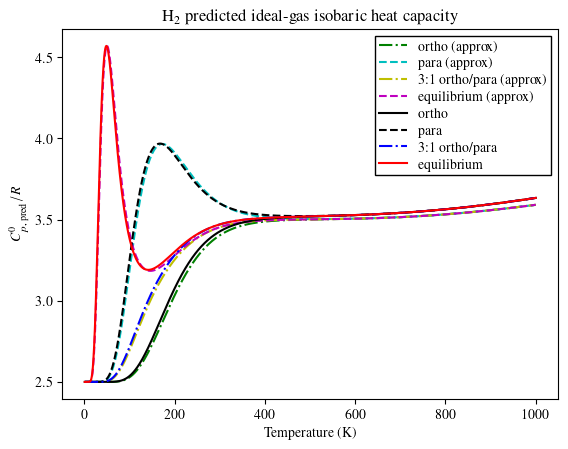

In [279]:
tgrid = np.linspace(1,1000,5000)

dgrd, normal_pred = gradgrid(tgrid, h2_rovibE_mix(tgrid)/kb_wav)
dgrd, eq_pred = gradgrid(tgrid, h2_rovibE_eq(tgrid)/kb_wav)

dgrd, para_pred = gradgrid(tgrid, h2_rovibE_even(tgrid)/kb_wav)
dgrd, ortho_pred = gradgrid(tgrid, h2_rovibE_odd(tgrid)/kb_wav)

dgrd, eq_apx = gradgrid(tgrid, h2_approx_eqE(tgrid)/kb_wav)

dgrd, para_apx = gradgrid(tgrid, h2_approx_evenE(tgrid)/kb_wav)
dgrd, ortho_apx = gradgrid(tgrid, h2_approx_oddE(tgrid)/kb_wav)
dgrd, normal_apx = gradgrid(tgrid, h2_approx_normE(tgrid)/kb_wav)



errs_ortho = calc_cp_ref(dgrd, type='ortho')-2.5-ortho_pred
errs_para = calc_cp_ref(dgrd, type='para')-2.5-para_pred
errs_normal = calc_cp_ref(dgrd, type='normal')-2.5-normal_pred

errs_ortho_apx = calc_cp_ref(dgrd, type='ortho')-2.5-ortho_apx
errs_para_apx = calc_cp_ref(dgrd, type='para')-2.5-para_apx
errs_normal_apx = calc_cp_ref(dgrd, type='normal')-2.5-normal_apx



fig, ax = plt.subplots()
ax.plot(dgrd, ortho_apx+2.5, 'g-.', label='ortho (approx)')
ax.plot(dgrd, para_apx+2.5, 'c--', label='para (approx)')
ax.plot(dgrd, normal_apx+2.5, 'y-.', label='3:1 ortho/para (approx)')
ax.plot(dgrd, eq_apx+2.5, 'm--', label='equilibrium (approx)')


ax.plot(dgrd, ortho_pred+2.5, 'k-', label='ortho')
ax.plot(dgrd, para_pred+2.5, 'k--', label='para')
ax.plot(dgrd, normal_pred+2.5, 'b-.', label='3:1 ortho/para')
ax.plot(dgrd, eq_pred+2.5, 'r-', label='equilibrium')


plt.xlabel("Temperature (K)")
plt.ylabel(r"$C^0_{p,\,\mathrm{pred}}/R$")
plt.title("H$_2$ predicted ideal-gas isobaric heat capacity")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
plt.show()
fig.savefig("cp_pred_apx.pdf")

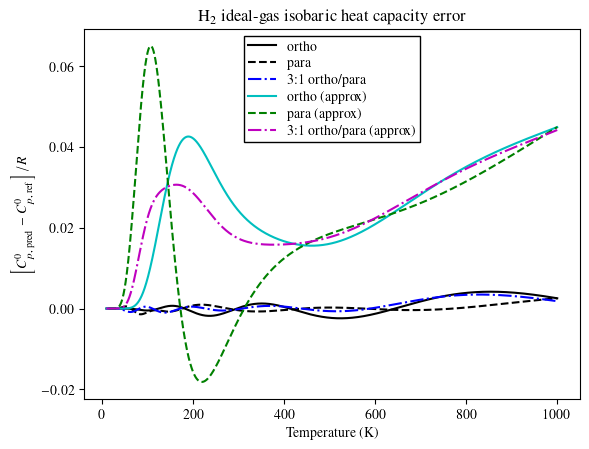

In [280]:
fig, ax = plt.subplots()
ax.plot(dgrd, errs_ortho, 'k-', label='ortho')
ax.plot(dgrd, errs_para, 'k--', label='para')
ax.plot(dgrd, errs_normal, 'b-.', label='3:1 ortho/para')
ax.plot(dgrd, errs_ortho_apx, 'c-', label='ortho (approx)')
ax.plot(dgrd, errs_para_apx, 'g--', label='para (approx)')
ax.plot(dgrd, errs_normal_apx, 'm-.', label='3:1 ortho/para (approx)')
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\left[C^0_{p,\,\mathrm{pred}}-C^0_{p,\,\mathrm{ref}}\right]/R$")
plt.title("H$_2$ ideal-gas isobaric heat capacity error")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
plt.show()
fig.savefig("cp_err_apx.pdf")

In [281]:
kb_wav

8.617333262e-05

In [282]:
vibE

0.515918867029831

In [283]:
rotE

0.007545678262491444

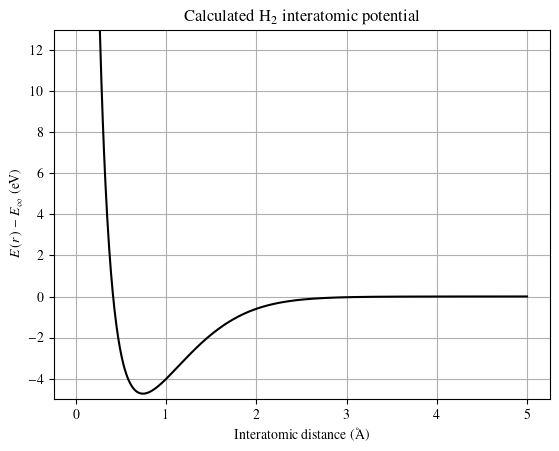

In [321]:
xgrd = np.linspace(1e-3, 5, 1000)
pot = V(xgrd)
fig, ax = plt.subplots()
ax.plot(xgrd,pot*nist.HARTREE2EV,'k-')
ax.set_ylim(ymax=13,ymin=-5)
ax.set_xlabel(r"Interatomic distance (Å)")
ax.set_ylabel(r"$E(r)-E_\infty$ (eV)")
ax.grid(visible=True)
ax.set_title(r"Calculated H${_2}$ interatomic potential")
plt.show()
fig.savefig("pot.pdf")

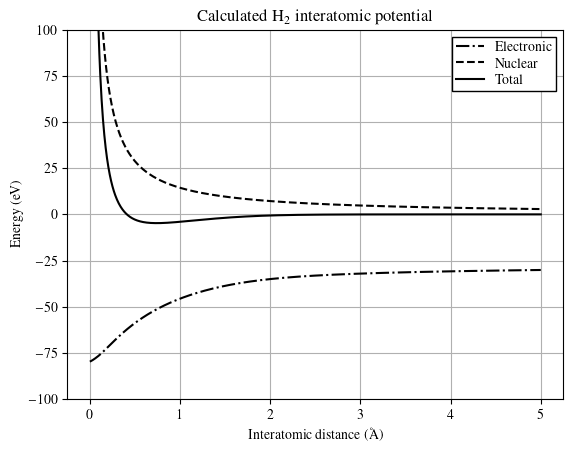

In [320]:
xgrd = np.linspace(1e-3, 5, 1000)
pot_e = elec_ifn(xgrd)
pot = V(xgrd)*nist.HARTREE2EV
fig, ax = plt.subplots()
ax.plot(xgrd,pot_e,'k-.', label='Electronic')
ax.plot(xgrd,nuc_fn(xgrd), 'k--', label='Nuclear')
ax.plot(xgrd,pot,'k-', label='Total')
ax.set_xlabel(r"Interatomic distance (Å)")
ax.set_ylabel(r"Energy (eV)")
ax.set_ylim(ymin=-100,ymax=100)
ax.grid(visible=True)
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)
ax.set_title(r"Calculated H${_2}$ interatomic potential")
plt.show()
fig.savefig("pot_elec_nuc.pdf")

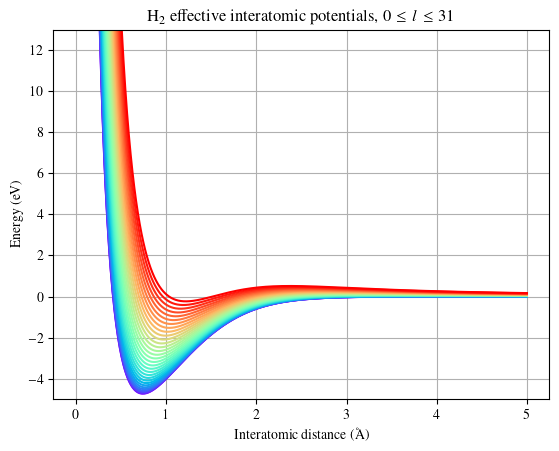

In [344]:
xgrd = np.linspace(1e-3, 5, 1000)
fig, ax = plt.subplots()
from matplotlib.pyplot import cm

#variable n below should be number of curves to plot

#version 1:


for l, color in enumerate(cm.rainbow(np.linspace(0, 1, 32))):
    pot = getVwithL(l,nist.PROTON_MASS / nist.E_MASS / 2)(xgrd)
    ax.plot(xgrd,pot*nist.HARTREE2EV, c=color)
ax.set_ylim(ymax=13,ymin=-5)
ax.set_xlabel(r"Interatomic distance (Å)")
ax.set_ylabel(r"Energy (eV)")
ax.grid(visible=True)
ax.set_title(r"H${_2}$ effective interatomic potentials, $0\le l\le 31$")
plt.show()
fig.savefig("pot_eff.pdf")

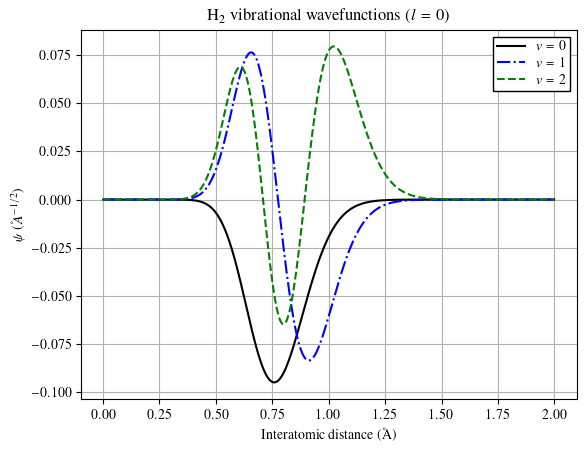

In [358]:
fig, ax = plt.subplots()

coords=xgrid<2

ax.plot(xgrid[coords], eigenvectors[coords,0], 'k-', label=r"$v=0$")
ax.plot(xgrid[coords], eigenvectors[coords,1], 'b-.', label=r"$v=1$")
ax.plot(xgrid[coords], eigenvectors[coords,2], 'g--', label=r"$v=2$")

ax.set_xlabel(r"Interatomic distance (Å)")
ax.set_ylabel(r"$\psi$ ($\AA^{-1/2}$)")
ax.grid(visible=True)
ax.set_title(r"H${_2}$ vibrational wavefunctions ($l=0$)")
ax.legend(edgecolor='black',fancybox=False, framealpha=1, shadow=False, borderpad=0.3, labelspacing=0.3)

plt.show()
fig.savefig("states.pdf")